C:\Users\rshiv\AppData\Local\Temp\ipykernel_4920\774324503.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("IdVd_D1_21_2.txt", delim_whitespace=True, header=None)


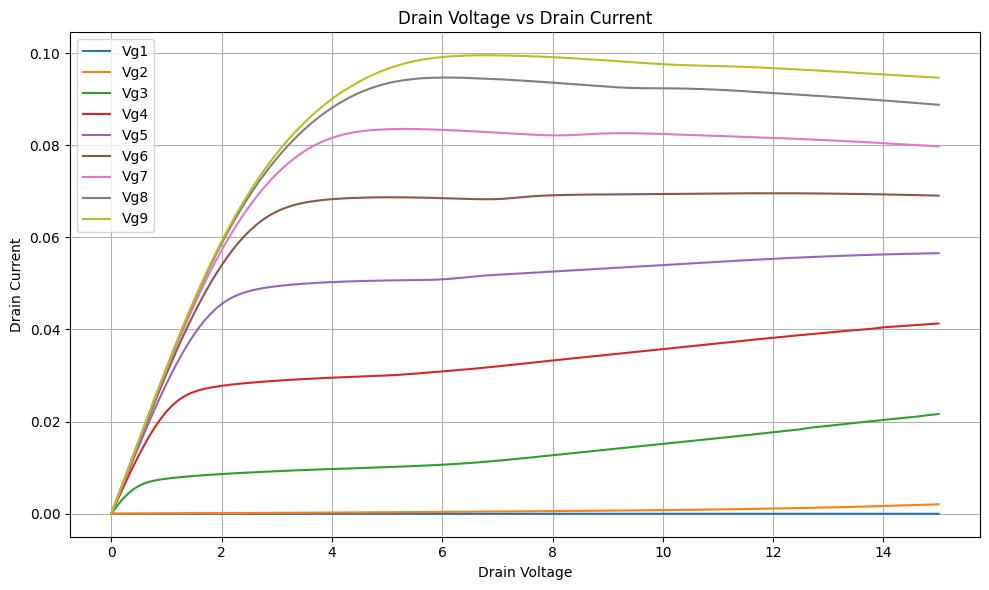

In [9]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("IdVd_D1_21_2.txt", delim_whitespace=True, header=None)
data.columns = [
    "Drain Voltage1", "Vg1", "Vg2", "Vg3", "Vg4", "Vg5", "Vg6", "Vg7", "Vg8", "Vg9",
    "Drain Voltage2", "Vg_1", "Vg_2", "Vg_3", "Vg_4", "Vg_5", "Vg_6", "Vg_7", "Vg_8", "Vg_9"
]

# Plotting using a loop
plt.figure(figsize=(10, 6))
for i in range(1, 10):  # Vg1 to Vg9
    plt.plot(data.iloc[1:]["Drain Voltage1"], data.iloc[1:][f"Vg{i}"], label=f"Vg{i}")

# Add plot decorations
plt.title('Drain Voltage vs Drain Current')
plt.xlabel('Drain Voltage')
plt.ylabel('Drain Current')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

df = data.loc[:, :"Vg9"]
gate_voltages = []
for col in df.columns[1:]:  # Skip the first column (Drain Voltage)
    if col.startswith('Vg'):
        # Extract the voltage value from the column name if needed
        # Otherwise, use the actual values from your first row
        gate_voltages.append(float(df.iloc[0, df.columns.get_loc(col)]))

# Convert to numpy array
gate_voltages = np.array(gate_voltages)

# Extract drain voltages
drain_voltages = df['Drain Voltage1'].values[1:]  # Skip the first row

# Now reshape the data for machine learning
# Create a new DataFrame with three columns: Drain_Voltage, Gate_Voltage, and Drain_Current
ml_data = []

# Iterate through each row (starting from row 1 which contains actual data)
for i in range(1, len(df)):
    drain_voltage = df.iloc[i, 0]  # Drain voltage from first column
    
    # Iterate through each gate voltage column
    for j in range(1, len(df.columns)):
        gate_voltage = df.iloc[0, j]  # Gate voltage from the first row
        drain_current = df.iloc[i, j]  # Drain current value
        
        ml_data.append([drain_voltage, gate_voltage, drain_current])

# Create a DataFrame for machine learning
ml_df = pd.DataFrame(ml_data, columns=['Drain_Voltage', 'Gate_Voltage', 'Drain_Current'])


In [10]:
df

,Drain Voltage1,Vg1,Vg2,Vg3,Vg4,Vg5,Vg6,Vg7,Vg8,Vg9
0,0.0,-7.000000e+00,-6.000000e+00,-5.000000e+00,-4.000000,-3.000000,-2.000000,-1.000000,0.000000e+00,1.000000e+00
1,0.0,1.625270e-08,-3.582880e-07,-6.015990e-07,-0.000002,0.000002,0.000001,0.000002,-1.099370e-07,-1.128770e-07
2,0.1,1.613030e-08,2.668450e-05,1.659470e-03,0.002693,0.002990,0.003111,0.003146,3.168430e-03,3.160520e-03
3,0.2,1.770000e-08,4.357140e-05,3.115050e-03,0.005329,0.005969,0.006226,0.006305,6.350570e-03,6.346860e-03
4,0.3,1.973830e-08,5.217770e-05,4.342910e-03,0.007900,0.008932,0.009341,0.009471,9.545550e-03,9.543820e-03
...,...,...,...,...,...,...,...,...,...,...
147,14.6,2.387780e-06,1.906260e-03,2.108790e-02,0.040981,0.056470,0.069165,0.080025,8.915260e-02,9.494260e-02
148,14.7,2.495140e-06,1.942450e-03,2.125940e-02,0.041067,0.056495,0.069137,0.079954,8.905720e-02,9.486760e-02
149,14.8,2.788190e-06,1.981320e-03,2.140680e-02,0.041150,0.056520,0.069108,0.079879,8.896250e-02,9.479470e-02
150,14.9,2.663710e-06,2.020470e-03,2.152220e-02,0.041230,0.056546,0.069076,0.079806,8.886880e-02,9.471660e-02


In [11]:
ml_df

,Drain_Voltage,Gate_Voltage,Drain_Current
0,0.0,-7.0,1.625270e-08
1,0.0,-6.0,-3.582880e-07
2,0.0,-5.0,-6.015990e-07
3,0.0,-4.0,-1.986430e-06
4,0.0,-3.0,2.040360e-06
...,...,...,...
1354,15.0,-3.0,5.656510e-02
1355,15.0,-2.0,6.905060e-02
1356,15.0,-1.0,7.973280e-02
1357,15.0,0.0,8.877000e-02


Epoch 1/250


C:\Users\rshiv\AppData\Local\Temp\ipykernel_4920\2578702912.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("IdVd_D1_21_2.txt", delim_whitespace=True, header=None)
c:\Users\rshiv\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 - 3s - 97ms/step - loss: 0.0029 - mae: 0.0349 - val_loss: 9.2726e-04 - val_mae: 0.0273
Epoch 2/250
27/27 - 0s - 15ms/step - loss: 1.8036e-04 - mae: 0.0098 - val_loss: 1.3478e-04 - val_mae: 0.0089
Epoch 3/250
27/27 - 0s - 10ms/step - loss: 7.8052e-05 - mae: 0.0065 - val_loss: 5.8168e-05 - val_mae: 0.0055
Epoch 4/250
27/27 - 0s - 9ms/step - loss: 6.1534e-05 - mae: 0.0054 - val_loss: 1.2778e-04 - val_mae: 0.0082
Epoch 5/250
27/27 - 0s - 8ms/step - loss: 4.9872e-05 - mae: 0.0048 - val_loss: 7.5439e-05 - val_mae: 0.0075
Epoch 6/250
27/27 - 0s - 7ms/step - loss: 5.2335e-05 - mae: 0.0049 - val_loss: 2.1651e-04 - val_mae: 0.0115
Epoch 7/250
27/27 - 0s - 6ms/step - loss: 4.3289e-05 - mae: 0.0046 - val_loss: 1.9388e-05 - val_mae: 0.0033
Epoch 8/250
27/27 - 0s - 6ms/step - loss: 3.7168e-05 - mae: 0.0042 - val_loss: 9.5631e-05 - val_mae: 0.0066
Epoch 9/250
27/27 - 0s - 6ms/step - loss: 2.3861e-05 - mae: 0.0032 - val_loss: 6.1872e-05 - val_mae: 0.0070
Epoch 10/250
27/27 - 0s - 6ms/step - loss

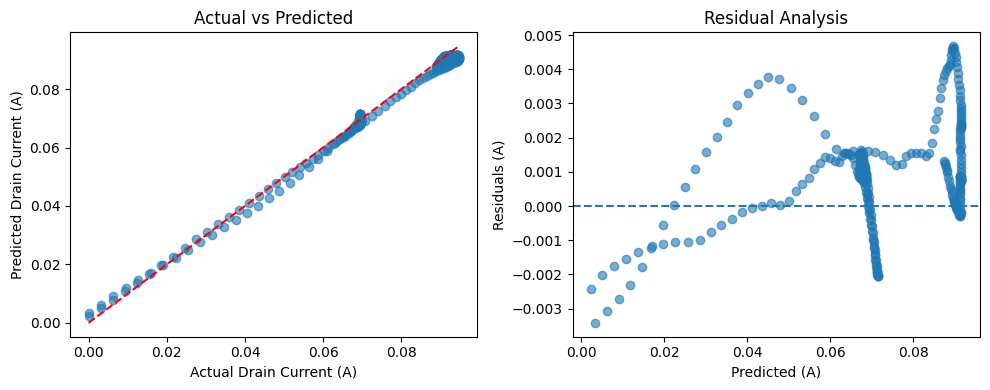

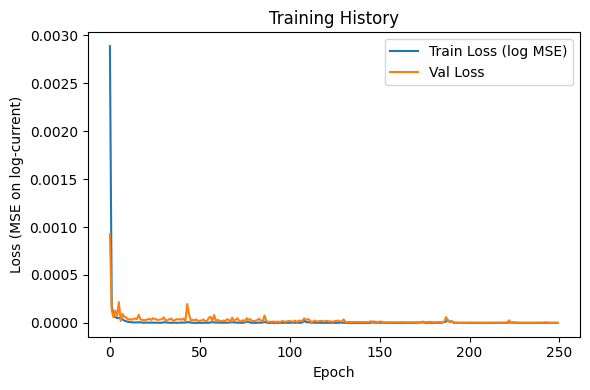

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras import layers, Sequential

# 1. Load raw data
data = pd.read_csv("IdVd_D1_21_2.txt", delim_whitespace=True, header=None)
data.columns = [
    "Drain Voltage1", "Vg1", "Vg2", "Vg3", "Vg4", "Vg5", "Vg6", "Vg7", "Vg8", "Vg9",
    "Drain Voltage2", "Vg_1", "Vg_2", "Vg_3", "Vg_4", "Vg_5", "Vg_6", "Vg_7", "Vg_8", "Vg_9"
]

# 2. Reshape to long format for ML: [Drain_Voltage, Gate_Voltage, Drain_Current]
ml_data = []
gate_cols = [f"Vg{i}" for i in range(1, 10)]
for i in range(1, len(data)):
    Vds = data.iloc[i, 0]
    for j, col in enumerate(gate_cols, start=1):
        Vgs = float(data.iloc[0, j])
        Id  = data.iloc[i, j]
        ml_data.append([Vds, Vgs, Id])
ml_df = pd.DataFrame(ml_data, columns=["Drain_Voltage", "Gate_Voltage", "Drain_Current"])

# 3. Log-transform the target to compress dynamic range
ml_df['Log_Current'] = np.log1p( ml_df['Drain_Current'] )

# 4. Split by Gate_Voltage to keep entire sweeps together
unique_gates = ml_df['Gate_Voltage'].unique()
train_gates = [-7.0, -6.0, -5.0, -4.0, -3.0, -1.0, 1.0]
test_gates = [-2.0, 0.0]
train_df = ml_df[ml_df['Gate_Voltage'].isin(train_gates)].reset_index(drop=True)
test_df  = ml_df[ml_df['Gate_Voltage'].isin(test_gates)].reset_index(drop=True)

# 5. Prepare features and log-target
X_train = train_df[['Gate_Voltage', 'Drain_Voltage']].values
y_train = train_df['Log_Current'].values
X_test  = test_df[['Gate_Voltage', 'Drain_Voltage']].values
y_test_log = test_df['Log_Current'].values
y_test_actual = test_df['Drain_Current'].values

# 6. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# 7. Build ANN (predicting log(Current))
model = Sequential([
    layers.Dense(256, activation='relu', input_shape=(2,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 8. Train model
history = model.fit(
    X_train, y_train,
    epochs=250,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)

# 9. Predict & invert log transform
y_pred_log = model.predict(X_test).flatten()
y_pred_actual = np.expm1(y_pred_log)

# 10. Evaluate on actual current scale
mse = mean_squared_error(y_test_actual, y_pred_actual)
r2  = r2_score(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
print(f"Test MSE (A^2): {mse:.4e}, R²: {r2:.4f}, MAE (A): {mae:.4e}")

test_df['Predicted_Current'] = y_pred_actual

# 11. Plots: Actual vs Predicted
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(y_test_actual, y_pred_actual, alpha=0.6)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel('Actual Drain Current (A)')
plt.ylabel('Predicted Drain Current (A)')
plt.title('Actual vs Predicted')

# Residuals
residuals = y_test_actual - y_pred_actual
plt.subplot(1,2,2)
plt.scatter(y_pred_actual, residuals, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicted (A)')
plt.ylabel('Residuals (A)')
plt.title('Residual Analysis')
plt.tight_layout()
plt.show()

# 12. Training & validation loss over epochs
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss (log MSE)')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE on log-current)')
plt.title('Training History')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
test_df

,Drain_Voltage,Gate_Voltage,Drain_Current,Log_Current,Predicted_Current
0,0.0,-2.0,1.361040e-06,1.361039e-06,0.002412
1,0.0,0.0,-1.099370e-07,-1.099370e-07,0.003416
2,0.1,-2.0,3.110960e-03,3.106131e-03,0.005126
3,0.1,0.0,3.168430e-03,3.163421e-03,0.006238
4,0.2,-2.0,6.225770e-03,6.206470e-03,0.007978
...,...,...,...,...,...
297,14.8,0.0,8.896250e-02,8.522541e-02,0.087741
298,14.9,-2.0,6.907600e-02,6.679472e-02,0.067624
299,14.9,0.0,8.886880e-02,8.513936e-02,0.087605
300,15.0,-2.0,6.905060e-02,6.677096e-02,0.067608


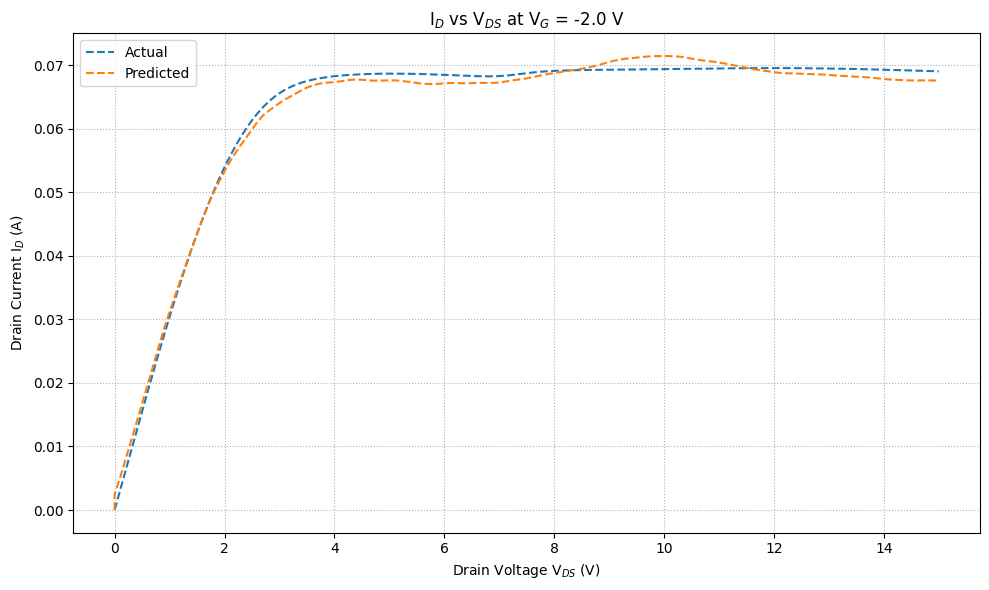

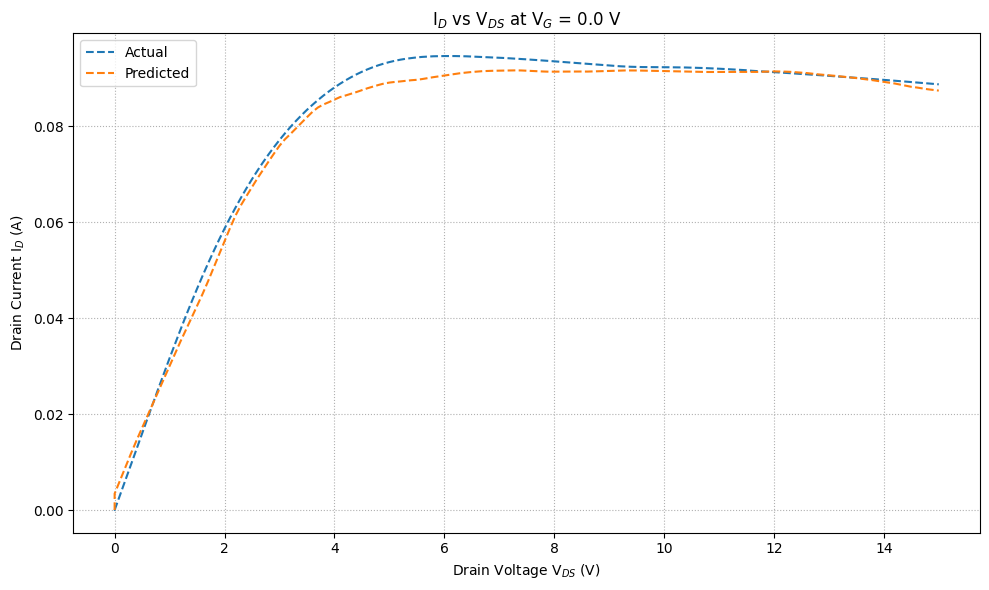

In [14]:
# When plotting ID vs VDS curves, add the origin point (0,0)
for vg in sorted(test_df['Gate_Voltage'].unique()):
    mask = test_df['Gate_Voltage'] == vg
    Vds_vals = test_df.loc[mask, 'Drain_Voltage'].values
    Id_actual = test_df.loc[mask, 'Drain_Current'].values
    Id_pred = test_df.loc[mask, 'Predicted_Current'].values
    
    # Add origin point (0,0) - prepend to arrays
    Vds_vals = np.insert(Vds_vals, 0, 0.0)
    Id_actual = np.insert(Id_actual, 0, 0.0)
    Id_pred = np.insert(Id_pred, 0, 0.0)
    
    plt.figure(figsize=(10,6))
    # Plot with origin point included
    plt.plot(Vds_vals, Id_actual, '--', label='Actual')
    plt.plot(Vds_vals, Id_pred, '--', label='Predicted')
    plt.xlabel('Drain Voltage V$_{DS}$ (V)')
    plt.ylabel('Drain Current I$_D$ (A)')
    plt.title(f'I$_D$ vs V$_{{DS}}$ at V$_G$ = {vg:.1f} V')
    plt.legend()
    plt.grid(True, linestyle=':')
    plt.tight_layout()
    plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


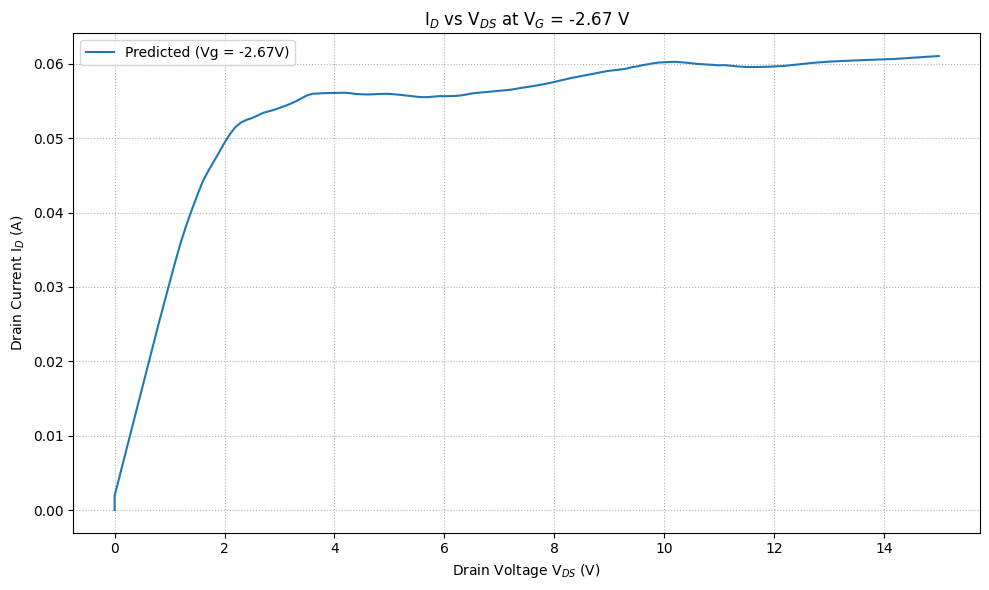

In [15]:
# Define new gate voltage value for prediction
new_gate_voltage = -2.67

# Use unique sorted drain voltages from test_df
vds_range = np.sort(test_df['Drain_Voltage'].unique())

# Create input array for prediction [Drain, Gate]
input_array = np.column_stack([np.full_like(vds_range, new_gate_voltage),vds_range])
input_scaled = scaler.transform(input_array)  # Only scale input

# Predict log(current) and invert log1p transform
predicted_log_current = model.predict(input_scaled).flatten()
predicted_current = np.expm1(predicted_log_current)  # Invert log1p (exp(log+1) - 1)

# Add origin point (0, 0)
vds_range = np.insert(vds_range, 0, 0.0)
predicted_current = np.insert(predicted_current, 0, 0.0)

# Plot
plt.figure(figsize=(10,6))
plt.plot(vds_range, predicted_current, '-', label=f'Predicted (Vg = {new_gate_voltage}V)')
plt.xlabel('Drain Voltage V$_{{DS}}$ (V)')
plt.ylabel('Drain Current I$_D$ (A)')
plt.title(f'I$_D$ vs V$_{{DS}}$ at V$_G$ = {new_gate_voltage} V')
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
input_array

array([[-2.67,  0.  ],
       [-2.67,  0.1 ],
       [-2.67,  0.2 ],
       [-2.67,  0.3 ],
       [-2.67,  0.4 ],
       [-2.67,  0.5 ],
       [-2.67,  0.6 ],
       [-2.67,  0.7 ],
       [-2.67,  0.8 ],
       [-2.67,  0.9 ],
       [-2.67,  1.  ],
       [-2.67,  1.1 ],
       [-2.67,  1.2 ],
       [-2.67,  1.3 ],
       [-2.67,  1.4 ],
       [-2.67,  1.5 ],
       [-2.67,  1.6 ],
       [-2.67,  1.7 ],
       [-2.67,  1.8 ],
       [-2.67,  1.9 ],
       [-2.67,  2.  ],
       [-2.67,  2.1 ],
       [-2.67,  2.2 ],
       [-2.67,  2.3 ],
       [-2.67,  2.4 ],
       [-2.67,  2.5 ],
       [-2.67,  2.6 ],
       [-2.67,  2.7 ],
       [-2.67,  2.8 ],
       [-2.67,  2.9 ],
       [-2.67,  3.  ],
       [-2.67,  3.1 ],
       [-2.67,  3.2 ],
       [-2.67,  3.3 ],
       [-2.67,  3.4 ],
       [-2.67,  3.5 ],
       [-2.67,  3.6 ],
       [-2.67,  3.7 ],
       [-2.67,  3.8 ],
       [-2.67,  3.9 ],
       [-2.67,  4.  ],
       [-2.67,  4.1 ],
       [-2.67,  4.2 ],
       [-2.